# Matrix Applications
This chapter goes through the applications of matrices

In [82]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import pandas as pd
import skimage.io
import scipy

## Multivariate Data Covariance Matrices
We have computed the Pearson Correlation Coefficient as the dot product between two variables, divided by the product of the vector norms. 

We will now compute covariance and correlation matrices from multivariate datasets.

Covariance is simply the numerator of the correlation equation- the dot product of two mean-centered variables. Covariance is interpreted the same way as correlation (positive when variables move together, and negative when they move apart, zero when the variables have no linear relationship), except the covariance retains the scale of the data, therefore it is not bound by $\pm 1$

Covariance also has a normalization factor of $n-1$, where $n$ is the number of data points. The normalization prevents the covariance from growing larger as you sum more data values together-

$c_{a,b} = (n-1)^{-1}\times\Sigma_{i=1}^{n}(x_i-\bar{x})(y_i-\bar{y})$

We will take $\tilde{x}$ to be the mean-centered variable $x$, then covariance is simply:

$c_{a,b}=\tilde{x}^T\tilde{y}/(n-1)$

The key insight to implementing this formula for multiple variables is that matrix multiplication is an organized collection of dot products between rows of the left matrix and columns of the right matrix.

We will create a matrix in which each column corresponds to each variable. This is $\mathbf{X}$. The matrix product $\mathbf{X}^T\mathbf{X}$ encodes all of the pair-wise covariances. Therefore the $(i,j)$th element in the covariance matrix is the dot product between data features $i$ and $j$.

The matrix equation for covariance:

$\mathbf{C}= \mathbf{X}^T\mathbf{X}\frac{1}{n-1}$

$\mathbf{C}$ is a symmetric matrix, since a matrix times its transpose is square symmetric, also the correlation between $i$ and $j$ is the same as between $j$ and $i$.

The diagonal elements of $\mathbf{C}$ contain the covariances of each variable with itself, which is called the variance, and quantifies the dispersion around the mean. (variance is the square of standard deviation).

To get the correlation, we use pre and post multiplication by a diagonal matrix.<br>
Remember that premultiplying a square matrix with a diagonal matrix scales the rows of the right matrix by the respective diagonal elements, and postmulitplying scales the columns of the left matrix by the diagonal elements.

So we can take the covariance matrix (not scaled by elements), extract the diagonal elements and extract the square-rooted diagonal values. We can then create a a diagonal matrix from the reciprocals, and then pre and postmultiply to obtain the correlation matrix.

In [5]:
url  = 'https://archive.ics.uci.edu/ml/machine-learning-databases/communities/communities.data'
data = pd.read_csv(url,sep=',',header=None)

In [6]:
data.columns = [ 'state', 'county', 'community', 'communityname', 'fold', 'population', 'householdsize', 'racepctblack', 'racePctWhite',
'racePctAsian', 'racePctHisp', 'agePct12t21', 'agePct12t29', 'agePct16t24', 'agePct65up', 'numbUrban', 'pctUrban', 'medIncome', 'pctWWage',
'pctWFarmSelf', 'pctWInvInc', 'pctWSocSec', 'pctWPubAsst', 'pctWRetire', 'medFamInc', 'perCapInc', 'whitePerCap', 'blackPerCap', 'indianPerCap',
'AsianPerCap', 'OtherPerCap', 'HispPerCap', 'NumUnderPov', 'PctPopUnderPov', 'PctLess9thGrade', 'PctNotHSGrad', 'PctBSorMore', 'PctUnemployed', 'PctEmploy',
'PctEmplManu', 'PctEmplProfServ', 'PctOccupManu', 'PctOccupMgmtProf', 'MalePctDivorce', 'MalePctNevMarr', 'FemalePctDiv', 'TotalPctDiv', 'PersPerFam', 'PctFam2Par',
'PctKids2Par', 'PctYoungKids2Par', 'PctTeen2Par', 'PctWorkMomYoungKids', 'PctWorkMom', 'NumIlleg', 'PctIlleg', 'NumImmig', 'PctImmigRecent', 'PctImmigRec5',
'PctImmigRec8', 'PctImmigRec10', 'PctRecentImmig', 'PctRecImmig5', 'PctRecImmig8', 'PctRecImmig10', 'PctSpeakEnglOnly', 'PctNotSpeakEnglWell', 'PctLargHouseFam', 'PctLargHouseOccup',
'PersPerOccupHous', 'PersPerOwnOccHous', 'PersPerRentOccHous', 'PctPersOwnOccup', 'PctPersDenseHous', 'PctHousLess3BR', 'MedNumBR', 'HousVacant', 'PctHousOccup', 'PctHousOwnOcc',
'PctVacantBoarded', 'PctVacMore6Mos', 'MedYrHousBuilt', 'PctHousNoPhone', 'PctWOFullPlumb', 'OwnOccLowQuart', 'OwnOccMedVal', 'OwnOccHiQuart', 'RentLowQ', 'RentMedian',
'RentHighQ', 'MedRent', 'MedRentPctHousInc', 'MedOwnCostPctInc', 'MedOwnCostPctIncNoMtg', 'NumInShelters', 'NumStreet', 'PctForeignBorn', 'PctBornSameState', 'PctSameHouse85',
'PctSameCity85', 'PctSameState85', 'LemasSwornFT', 'LemasSwFTPerPop', 'LemasSwFTFieldOps', 'LemasSwFTFieldPerPop', 'LemasTotalReq', 'LemasTotReqPerPop', 'PolicReqPerOffic', 'PolicPerPop',
'RacialMatchCommPol', 'PctPolicWhite', 'PctPolicBlack', 'PctPolicHisp', 'PctPolicAsian', 'PctPolicMinor', 'OfficAssgnDrugUnits', 'NumKindsDrugsSeiz', 'PolicAveOTWorked', 'LandArea',
'PopDens', 'PctUsePubTrans', 'PolicCars', 'PolicOperBudg', 'LemasPctPolicOnPatr', 'LemasGangUnitDeploy', 'LemasPctOfficDrugUn', 'PolicBudgPerPop', 'ViolentCrimesPerPop',
 ]

In [7]:
data.head()

#get only the numeric features
numberDataset = data._get_numeric_data()

#drop some unnecessary columns
dataMat = numberDataset.drop(['state','fold'],axis=1).values

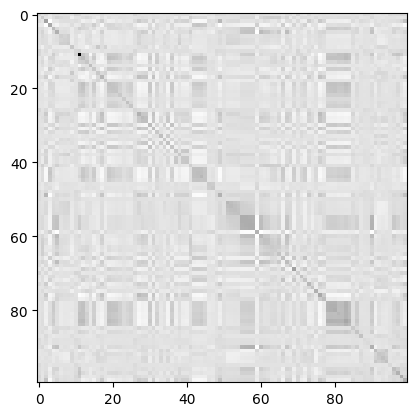

In [8]:
#calculating the means
dataMeans=np.mean(dataMat,axis=0)
dataMatM = dataMat-dataMeans #mean-centering the data
covMat = dataMatM.T@ dataMatM
covMat/= (dataMatM.shape[0]-1)


fig,ax = plt.subplots()
ax.imshow(covMat,cmap='Greys')

In [9]:
#calculating the means
dataMeans=np.mean(dataMat,axis=0)
dataMatM = dataMat-dataMeans #mean-centering the data
covMat = dataMatM.T@ dataMatM

cov=np.diag(1/np.sqrt(np.diag(covMat)))
R = cov@covMat@cov

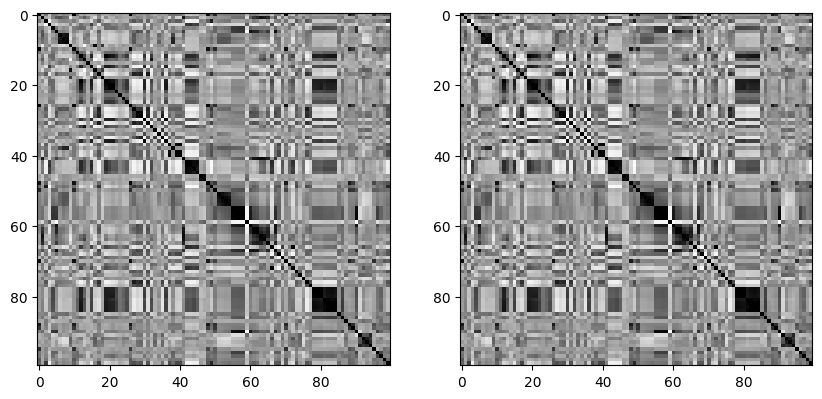

In [11]:
covf=np.corrcoef(dataMat.T)
fig,ax = plt.subplots(1,2,figsize=(10,5))
ax[0].imshow(covf,cmap='Greys')
ax[1].imshow(R,cmap='Greys')

## Geometric Transformations via Matrix-Vector Multiplication
One of the purposes of matrix-vector multiplication is to apply a geometric transform to a set of coordinates. We will see this in 2D static images and animations.

A *pure rotation matrix* rotates a vector while preserving its length. We can express a 2D rotation matrix as:

$\mathbf{T} = \begin{bmatrix}cos(\theta)&sin(\theta)\\ -sin(\theta)& cos(\theta)\end{bmatrix}$

A pure rotation matrix is an exampel of an *orthogonal matrix*, as the columns of $\mathbf{T}$ are orthogonal and are unit vectors.

To use this transformation matrix, set $\theta$ to some angle of clockwise rotation, and then multiply matrix $\mathbf{T}$ by a $2\times N$ matrix of geometric points, where each column in that matrix contains the $(X,Y)$ coordinates for each of $N$ data points.

IN GENERAL: the diagonal elements scale the x-axis and y-axis coordiantes, while the off-diagonal elements stretch both axes. 

[(-5.0, 5.0), (-6.0, 6.0)]

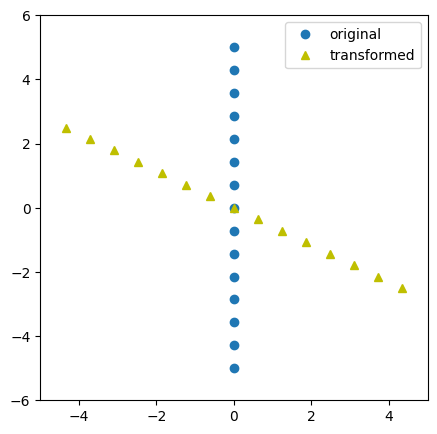

In [61]:
A = np.zeros((15,2))
A[:,1]=np.linspace(-5,5,15)

theta = -np.pi/3
T = np.array([[np.cos(theta),np.sin(theta)],[-np.sin(theta),np.cos(theta)]])
             
C = T@A.T
fig,ax = plt.subplots(figsize=(5,5))
ax.plot(A[:,0],A[:,1],ls='',color='C0',marker='o',label='original')
ax.plot(C[0,:],C[1,:],ls='',color='y',marker='^',label='transformed')
ax.legend()
ax.set(xlim=(-5,5),ylim=(-6,6))

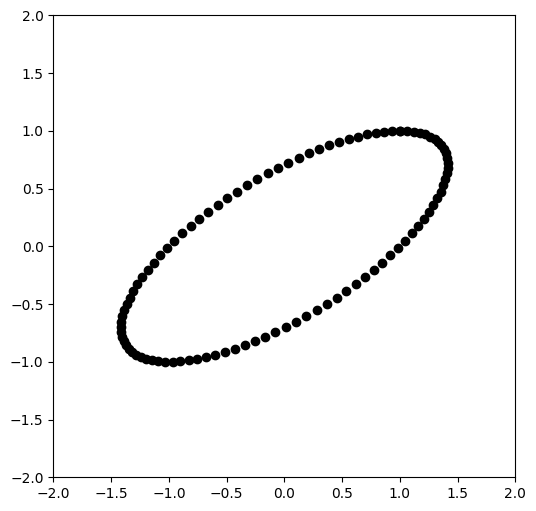

In [60]:
#the wobbly circle
# function to update the axis on each iteration
def aframe(ph):

  # create the transformation matrix
  T = np.array([
                 [  1,ph],
                 [  0,1]
                ])

  # apply the transformation to the points using matrix multiplication
  P = T@points

  # update the dots
  plth.set_xdata(P[0,:])
  plth.set_ydata(P[1,:])

  # export the plot handles
  return plth


# define XY points
theta  = np.linspace(0,2*np.pi,100)
points = np.vstack((np.sin(theta),np.cos(theta)))


# setup figure
fig,ax = plt.subplots(1,figsize=(12,6))
plth,  = ax.plot(np.sin(x),np.cos(x),'ko')
ax.set_aspect('equal')
ax.set_xlim([-2,2])
ax.set_ylim([-2,2])

# define values for transformation (note: clip off the final point for a smooth animation loop)
phi = np.linspace(-1,1-1/40,40)**2

# run animation!
ani = FuncAnimation(fig, aframe, phi, interval=100, repeat=True)
HTML(ani.to_html5_video())

## Image Feature Detection
Image filtering is a mechanism for image feature detection. Just like with time series filtering or feature detection, where you design a kernel, and then create a time series of dot products between the kernel and overlapping segments of the signal.

Image filtering works the same way, but in 2D. A 2D kernel is designed and then create a new image comprising 'dot products' between the kernel and overlapping windows of the image.

This operation is not formally the same as the vector dot product, but the computation is the same- element-wise multiplication and sum- however the operation takes place between two matrices, so the implementation is Hadamard multiplication and sum over all matrix elements.

What is a 2D Gaussian Kernel? It is given by the following equation:

$G = exp(-(X^2+Y^2)/\sigma)$

The $X$ and $Y$ are 2D grid of $x,y$ coordinates on which to evalute the function. finally, $\sigma$ is a parameter of the function often called the 'shape' or 'width'. Smaller values make the Gaussian narrower, and larger values make it wider.

Notice the code below:

The $X$ and $Y$ grids go from -3 to +3 in 21 steps. The width parameter is hardcoded to 20. The third line normalizes the values in the kernel so that the sum over the entire kernel is 1. This preserves the original scale of the data. When properly normalized, each step of convolution- and therefore, each pixel in the filtered image -becomes a weighted average of the surrounding pixels, with the weights defined by the Gaussian.

We will use it to smooth a random number matrix.

Implementing convolution as a double for loop (over rows and columns) is actually computationally inefficient. It turns out that convolution can be implemented faster in the frequency domain.

This is due to the convolution theorem- which states that convolution in the time or space domain is equal to multiplication in the frequency domain- this will not be explained furthur. We will just use it to justify the use of SciPy's `convolve2D` function instead of the double for loop implementation, particularly for large image.


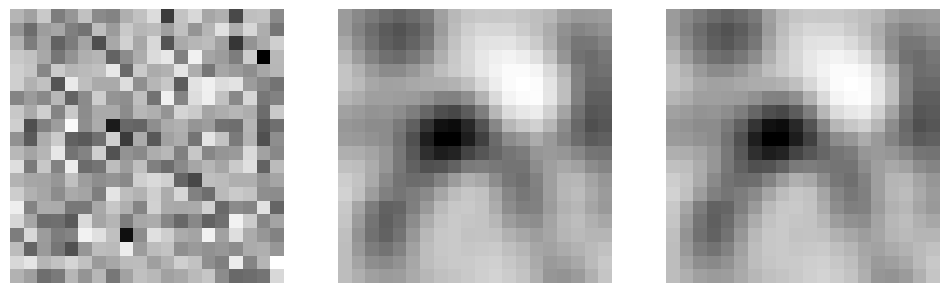

In [78]:
# we will try to smoothen a real picture- the Stedeljik Museum in Amsterdam. The image is a
# 3d matrix because it has  rows, columns, and depth- the depth contains the pixel intensity
# values from the red, green and blue color channels. This picture is stored as a matrix in 
# R^1675x3000x3. Formally, it's a tensor because it's a cube, not a spreadsheet of numbers.

#Firstly we will reduce the picture to a 2D matrix by converting to greyscale.
# That simplifies the computation, though unecessary.

imgN =20
img = np.random.randn(imgN*imgN).reshape((imgN,imgN))
fig,ax = plt.subplots()
ax.imshow(img,'Greys')
ax.set_axis_off()
plt.close()

kernelN=7
Y,X = np.meshgrid(np.linspace(-3,3,kernelN),np.linspace(-3,3,kernelN))
kernel= np.exp(-(X**2+Y**2)/7)
kernel= kernel/np.sum(kernel) #normalize

#the convolution
halfKr = kernelN//2
convoutput = np.zeros((imgN+kernelN-1,imgN+kernelN-1)) #the output
imagePad = np.zeros(convoutput.shape)
imagePad[halfKr:-halfKr,halfKr:-halfKr] = img

for rowi in range(halfKr,imgN+halfKr):
    for coli in range(halfKr,imgN+halfKr):

        #cut out a piece of image
        pieceOfImg = imagePad[rowi-halfKr:rowi+halfKr+1:1,coli-halfKr:coli+halfKr+1:1]

        #dot product: element wise multiplication and sum
        dot = np.sum(pieceOfImg*kernel)

        #placing the value in the convoutput
        convoutput[rowi,coli]=dot

# trim off edges
convoutput = convoutput[halfKr:-halfKr:1,halfKr:-halfKr:1]

#using the scipy function
convoutput2 = scipy.signal.convolve2d(img,kernel,mode='same')

fig,ax = plt.subplots(1,3,figsize=(12,6))
ax[0].imshow(img,'Greys')
ax[0].set_axis_off()

ax[1].imshow(convoutput,'Greys')
ax[1].set_axis_off()

ax[2].imshow(convoutput2,'Greys')
ax[2].set_axis_off()
# plt.close()


In [88]:
# read a pic from the web
bathtub = skimage.io.imread('https://upload.wikimedia.org/wikipedia/commons/6/61/De_nieuwe_vleugel_van_het_Stedelijk_Museum_Amsterdam.jpg')

# check the size
print(bathtub.shape)

(1675, 3000, 3)


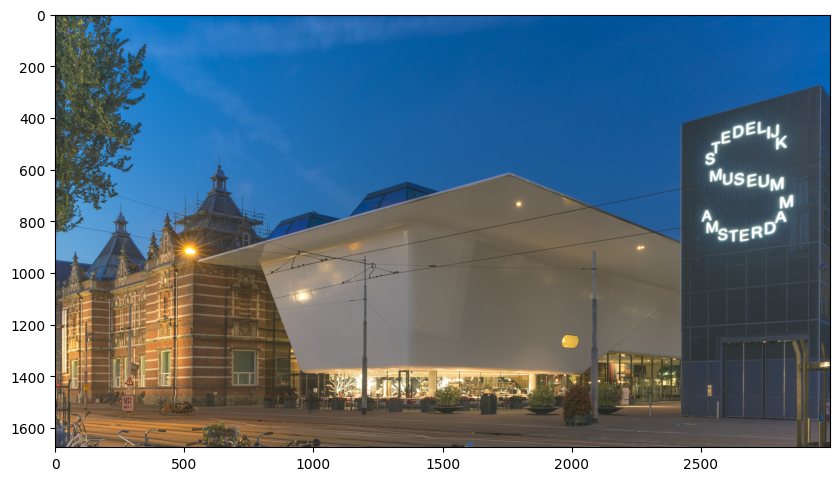

In [89]:
# let's see what the famous Bathtub Museum looks like
fig = plt.figure(figsize=(10,6))
plt.imshow(bathtub)

(1675, 3000)


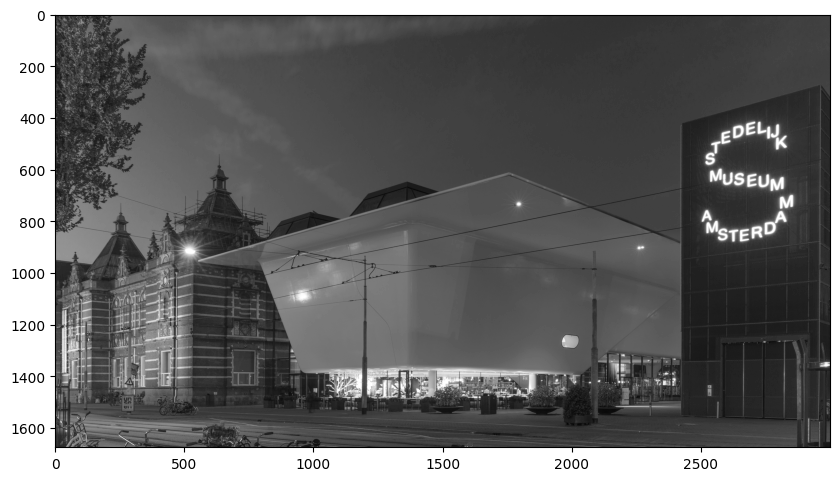

In [97]:
# transform image to 2D for convenience (not necessary for convolution!)
bathtub2d = skimage.color.rgb2gray(bathtub)

# check the size again
print(bathtub2d.shape)

fig = plt.figure(figsize=(10,6))
plt.imshow(bathtub2d,'gray')

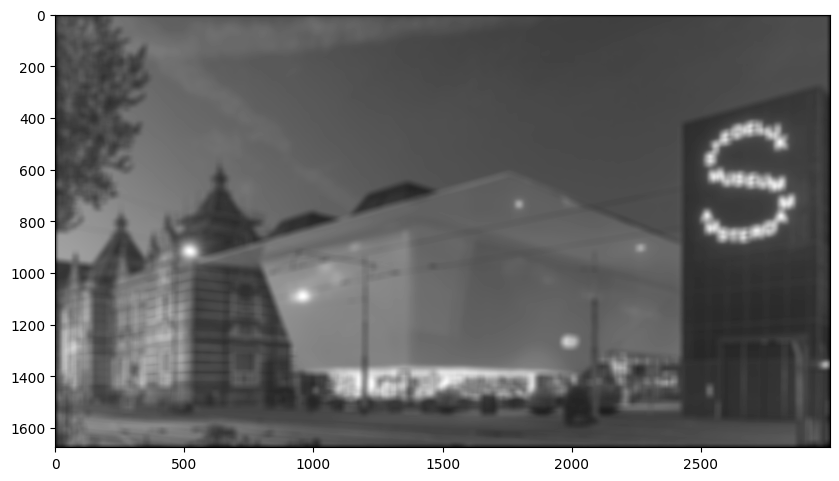

In [96]:
# convolution kernel
kernelN = 30 
Y,X     = np.meshgrid(np.linspace(-3,3,kernelN),np.linspace(-3,3,kernelN))
kernel  = np.exp( -(X**2+Y**2)/20 )
kernel  = kernel / np.sum(kernel) # normalize the kernel to integrate to 1, which preserves the numerical scale of the image.

# smoothing via Gaussian convolution
smooth_bathtub = scipy.signal.convolve2d(bathtub2d,kernel,mode='same')


fig = plt.figure(figsize=(10,6))
plt.imshow(smooth_bathtub,cmap='gray')
plt.show()

Both examples used a Gaussian kernel, but there are an infinite number of kernels- There are kernels to identify vertical and horizontal lines, these feature detectors are common in image processing.

Image convolution kernels are a major topic in computer vision. The incredible performance of CNN (the deep learning architecture optimized for computer vision) is entirely due to the network's ability to craft optimal filter kernels through learning.